# Identify tumor regions on Slide-tags data.



In this tutorial, we foucs on the Slide-tags human melanoma data. The raw data and processed data are available at [Google Drive](https://drive.google.com/drive/folders/1rAAbJcpMbXLz8eqNsPCE90pa9DpdijjH?usp=sharing). 

In [33]:
import os
# set visible GPU 0
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [34]:

import scanpy as sc
import matplotlib.pyplot as plt
import sys
# Import MultiGATE package
sys.path.insert(0, '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/tutorial_notebooks')
import MultiGATE 

### Load scRNA seq data

In [35]:

base_path = './outputslidetags0831_cluster2/'
import os
os.makedirs(base_path, exist_ok=True)


file_name= os.path.join(base_path,'slideTags_adata1.h5ad')
adata1 = sc.read_h5ad(file_name)
adata1

AnnData object with n_obs × n_vars = 833 × 3000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'louvain', 'wnn'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Spatial_Net', 'avg', 'gene_peak_Net', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'umap', 'wnn_colors'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'
    obsp: 'avg_connectivities', 'avg_distances'

### Load ATAC data

In [36]:
import os
file_name= os.path.join(base_path,'slideTags_adata2.h5ad')
adata2 = sc.read_h5ad(file_name)
adata2


AnnData object with n_obs × n_vars = 833 × 13665
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'wnn'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'chrom', 'chromStart', 'chromEnd'
    uns: 'Spatial_Net', 'gene_peak_Net', 'hvg', 'log1p'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'

In [37]:

adata1 = adata1[:, adata1.var['highly_variable']]
adata2 = adata2[:, adata2.var['highly_variable']]

MultiGATE.Cal_gene_peak_Net_new(adata1, adata2, 150000,file = '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/tutorial/data_tutorial/human/gencode.v25.chr_patch_hapl_scaff.annotation.gtf.gz')
adata1.uns['gene_peak_Net'] = adata2.uns['gene_peak_Net']

/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/MultiGATE/Reproduce/clustering/MultiGATE/utils.py:192: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  rna.var['chrom'] = gene_df.loc[rna.var_names, 'chrom']
/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/MultiGATE/Reproduce/clustering/MultiGATE/utils.py:209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  atac.var[['chrom', 'chromStart', 'chromEnd']] = chrom_info
/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/MultiGATE/Reproduce/clustering/MultiGATE/utils.py:231: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  dist = biadjacency_matrix(dist_graph, genes.index, peaks.index, weight="dist", dtype=np.float32).tocoo()
/users/s1155202250/basic/conda/condainstall/envs/MultiGATEh

The graph contains 8200 edges, 1828 genes.
4.4858 peaks per gene on average.


## Running MultiGATE

In [38]:
num_epoch = 3000 
adata1, adata2 = MultiGATE.train_MultiGATE(adata1, adata2, bp_width = 400,n_epochs=num_epoch,save_attention=False) 

2025-06-16 16:02:55.971727: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:3b:00.0
2025-06-16 16:02:55.971918: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2025-06-16 16:02:55.971934: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2025-06-16 16:02:55.971946: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2025-06-16 16:02:55.971957: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2025-06-16 16:02:55.971969: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10.0
2025-06-16 16:02:55.971988: I tensorflow/stream_executor

## Clustering

In [39]:
size = 10
resolution =  0.1 
sc.pp.neighbors(adata1, use_rep='MultiGATE_clip_all',key_added = 'avg') 
sc.tl.louvain(adata1, resolution=resolution,neighbors_key = 'avg')

## Plotting the results

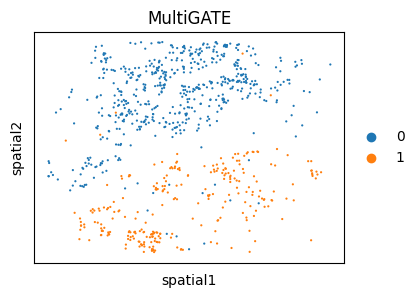

In [40]:
size=10
plt.rcParams["figure.figsize"] = (4, 3) 

sc.tl.umap(adata1,neighbors_key = 'avg',)
sc.pl.embedding(adata1, basis="spatial", color="louvain",s=size, show=False, title='MultiGATE',)
plt.show()

In [41]:
adata1.write( os.path.join(base_path,'slideTags_adata1.h5ad'))
adata2.write( os.path.join(base_path,'slideTags_adata2.h5ad'))